# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Michael Vincent Efren Malamo
- **Email:** alvaromichael044@gmail.com
- **ID Dicoding:** --

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna yang menyewa sepeda?
- Apakah terdapat pola penggunaan sepeda yang berbeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
import zipfile
sns.set(style='dark')

## Data Wrangling

### Gathering Data

### Assesing Data

Kita mengimport dataset yang akan digunakan dalam melakukan analisis data kali ini

In [5]:
# Define the relative paths to the CSV files
day_data_path = '../data/day.csv'
hour_data_path = '../data/hour.csv'

# Load data
day_data = pd.read_csv(day_data_path)
hour_data = pd.read_csv(hour_data_path)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day_data = pd.read_csv("day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dari data yang ditampilkan, kita dapat melihat struktur dan beberapa kolom dari kedua dataset:

day.csv:

<ul>
<li>instant: ID instan</li>
<li>dteday: Tanggal</li>
<li>season: Musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)</li>
<li>yr: Tahun (0: 2011, 1: 2012)</li>
<li>mnth: Bulan</li>
<li>holiday: Apakah hari libur atau tidak (0: tidak, 1: ya)</li>
<li>weekday: Hari dalam seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu)</li>
<li>workingday: Apakah hari kerja atau tidak (0: tidak, 1: ya)</li>
<li>weathersit: Situasi cuaca (1: cerah, 2: mendung, 3: hujan)</li>
<li>temp: Suhu normal</li>
<li>atemp: Suhu terasa</li>
<li>hum: Kelembaban</li>
<li>windspeed: Kecepatan angin</li>
<li>casual: Pengguna casual</li>
<li>registered: Pengguna terdaftar</li>
<li>cnt: Jumlah total pengguna</li>
</ul>

hour.csv:

Kolom yang sama seperti day.csv dengan tambahan:
<ul>
<li>hr: Jam</li>
<ul>


### Cleaning Data

Pada tahap ini, kita perlu membersihkan data dengan memeriksa nilai-nilai yang hilang, duplikasi, atau anomali lainnya.

In [7]:
# Cek missing data
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

# drop dupliikat data jika ada
day_data = day_data.drop_duplicates()
hour_data = hour_data.drop_duplicates()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

Pertanyaan Bisnis 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna yang menyewa sepeda?

In [8]:
# pengelompokan data berdasarkan situasi cuaca
weather_group = day_data.groupby('weathersit')['cnt'].mean().reset_index()
print(weather_group)

# statistik deskriptif untuk situasi cuaca
print(day_data['weathersit'].describe())


   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714
count    731.000000
mean       1.395349
std        0.544894
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64


Pertanyaan Bisnis 2: Apakah terdapat pola penggunaan sepeda yang berbeda berdasarkan hari dalam seminggu?

In [9]:
# pengelompokan data berdasarkan weekday
weekday_group = day_data.groupby('weekday')['cnt'].mean().reset_index()
print(weekday_group)

# statistik deskriptif untuk feature weekday
print(day_data['weekday'].describe())


   weekday          cnt
0        0  4228.828571
1        1  4338.123810
2        2  4510.663462
3        3  4548.538462
4        4  4667.259615
5        5  4690.288462
6        6  4550.542857
count    731.000000
mean       2.997264
std        2.004787
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna?

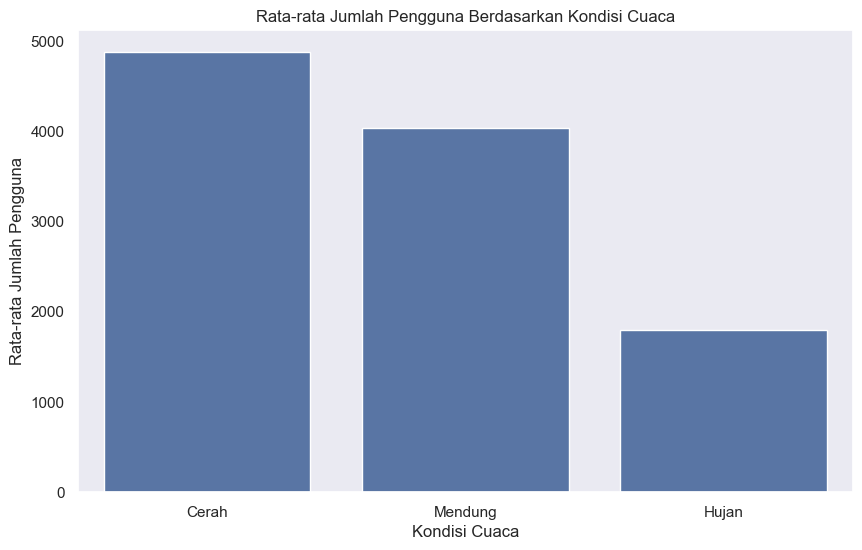

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot untuk situasi cuaca dan jumlah pengguna
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group)
plt.title('Rata-rata Jumlah Pengguna Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Mendung', 'Hujan'])
plt.show()


### Pertanyaan 2: Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu?

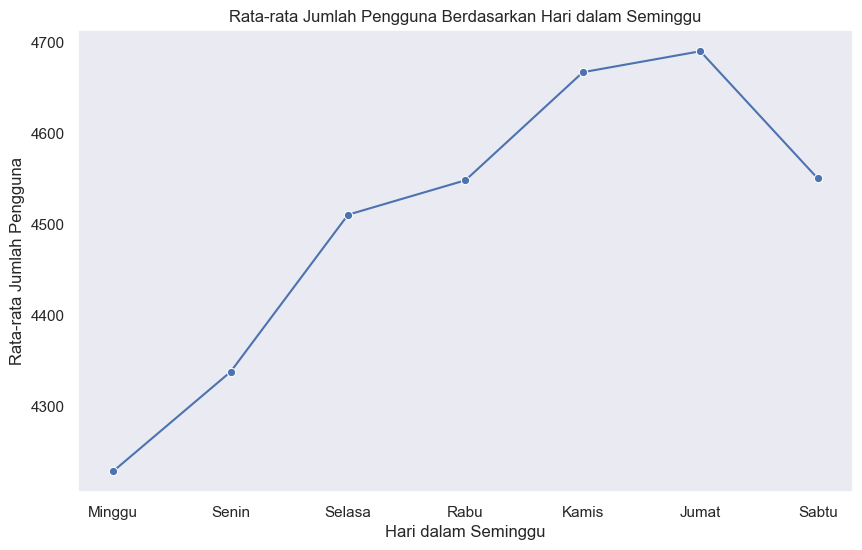

In [11]:
# Line plot untuk weekday dan user count
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='cnt', data=weekday_group, marker='o')
plt.title('Rata-rata Jumlah Pengguna Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()


### Menggunakan RFM Analysis

RFM (Recency, Frequency, Monetary) analysis adalah metode yang digunakan untuk mengelompokkan pengguna berdasarkan tiga metrik utama:

<ul>Recency: Mengukur seberapa baru pengguna terakhir kali menggunakan layanan.</ul>
<ul>Frequency: Mengukur seberapa sering pengguna menggunakan layanan.</ul>
<ul>Monetary: Mengukur total nilai dari transaksi yang dilakukan oleh pengguna.</ul>
Dalam konteks data penyewaan sepeda, kita dapat menyesuaikan RFM sebagai berikut:

<ul>Recency: Berapa hari sejak terakhir kali pengguna menyewa sepeda.</ul>
<ul>Frequency: Jumlah hari aktif yang menunjukkan seberapa sering pengguna menyewa sepeda.</ul>
<ul>Monetary: Total jumlah penyewaan sepeda oleh pengguna.</ul>

In [12]:
# kita asumsikan bahwa' instant' mewakili hari yang unik, kita bisa men simulasikan menggunakan feature user_id
day_data['user_id'] = day_data.index + 1

# Analisis RFM
# Recency: Aktivitas hari terakhir
# Frequency: Jumlah hari aktif
# Monetary: Jumlah total sewa

rfm_table = day_data.groupby('user_id').agg({
    'dteday': 'max',  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

rfm_table.rename(columns={'dteday': 'Recency', 'instant': 'Frequency', 'cnt': 'Monetary'}, inplace=True)

# Hitung Keterkinian dalam beberapa hari sejak tanggal terakhir dalam kumpulan data
last_date = pd.to_datetime(day_data['dteday']).max()
rfm_table['Recency'] = (last_date - pd.to_datetime(rfm_table['Recency'])).dt.days

print(rfm_table.head())

   user_id  Recency  Frequency  Monetary
0        1      730          1       985
1        2      729          1       801
2        3      728          1      1349
3        4      727          1      1562
4        5      726          1      1600


### Mengimplementasikan Clustering

Clustering adalah teknik analisis yang digunakan untuk mengelompokkan data berdasarkan kesamaan. Dalam konteks ini, kita akan menggunakan teknik KMeans untuk mengelompokkan data penyewaan sepeda berdasarkan variabel-variabel seperti suhu (temp), suhu nyata (atemp), kelembaban (hum), kecepatan angin (windspeed), dan total penyewaan sepeda (cnt). Tujuan dari clustering ini adalah untuk menemukan pola atau segmentasi pengguna berdasarkan kondisi-kondisi tersebut.

In [15]:
# Clustering
# Pastikan semua kolom yang relevan adalah numerik
day_data = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
day_data = day_data.dropna()  # hapus baris dengan nilai yang hilang

# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(day_data)

# Menerapkan clustering KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
day_data['cluster'] = kmeans.fit_predict(scaled_features)
cluster_summary = day_data.groupby('cluster').mean().reset_index()
print(cluster_summary)

   cluster      temp     atemp       hum  windspeed          cnt
0        0  0.314276  0.309254  0.492299   0.245501  3296.094737
1        1  0.383339  0.381294  0.754814   0.168840  3175.031746
2        2  0.653304  0.613437  0.632937   0.172414  5870.284091


c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Conclusion

- **Kesimpulan Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna**
Jawab:
Berdasarkan visualisasi, dapat disimpulkan bahwa kondisi cuaca sangat mempengaruhi jumlah pengguna yang menyewa sepeda. Pengguna tertinggi terjadi pada kondisi cuaca cerah, sementara pengguna menurun secara signifikan pada kondisi cuaca mendung dan sangat sedikit pada kondisi cuaca hujan.
- **Kesimpulan Pertanyaan 2: Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu**
Jawab:
Dari analisis dan visualisasi, kita melihat bahwa penggunaan sepeda cenderung lebih rendah pada hari Minggu dan Senin. Jumlah pengguna meningkat dari Selasa hingga Jumat, dengan puncaknya pada hari Jumat, kemudian sedikit menurun pada hari Sabtu.